In [72]:
from astropy.io import fits
from astropy.table import Table, Column, hstack
import numpy as np
import rafias_lib as rl
import pdb
import glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)

In [86]:
def rms_vs_bin(x, y, gain, filenames, bin_size_low, bin_size_up, bin_size_inc, num_points, style, lbl = None):
    x1 = x[2:]
    y1 = y[2:]
    
    stdev_array = []
    time_array = []
    bin_size_array = np.arange(bin_size_low, bin_size_up, bin_size_inc)
    for bin_size in bin_size_array:
        flux_array = []
        for bins in range(0, num_points, bin_size):
            bin_start = bins
            bin_end   = bins + bin_size
            flux_in_one_bin = np.average(y1[bin_start:bin_end])
            flux_array.append(flux_in_one_bin)
        norm_flux_array = flux_array/np.median(y1[bin_start:bin_end])
        stdev_in_one_bin = np.std(norm_flux_array)
        stdev_array.append(stdev_in_one_bin*1e6)
        time_point = x1[bin_size] - x1[0]
        time_array.append(time_point)

    error = np.median(rl.norm_flux_error(y1/np.median(y1), gain, filenames[2:]))*1e6
    i_scale = stdev_array[0]/np.sqrt(bin_size_array)
    i_noise = error/np.sqrt(bin_size_array)
    plt.loglog(time_array,stdev_array, style, label = lbl)
    plt.loglog(time_array, i_scale, 'k--', label = 'Ideal scaling')
    plt.loglog(time_array, i_noise, 'g--', label = 'Ideal noise')
    plt.xlabel('Bin size (seconds)')
    plt.ylabel('$\sigma$ (ppm)')


In [74]:
filenames = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53/*.slp.fits')

In [75]:
centers = rl.gen_center_g2d(166,160,5,400,2,2,0,filenames)[0]

In [76]:
data = rl.time_series(centers, 90, filenames)

In [ ]:
data1 = rl.average_residual_flux()

In [77]:
errors = rl.norm_flux_error(data['Flux'], 2.2, filenames)
error = np.median(errors)
stdev = np.std(data['Flux']/np.median(data['Flux']))

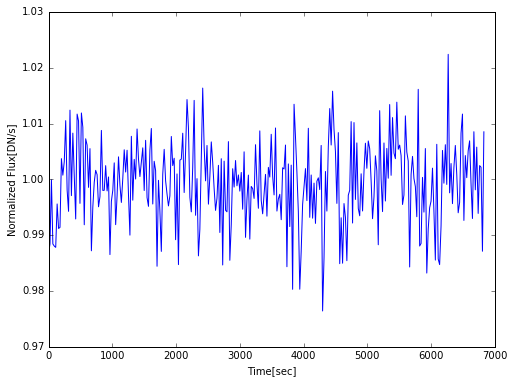

In [89]:
rl.light_curve(data['Time'], data['Flux'], '-')

Theoretical error: 0.000080
Measured error: 0.007409


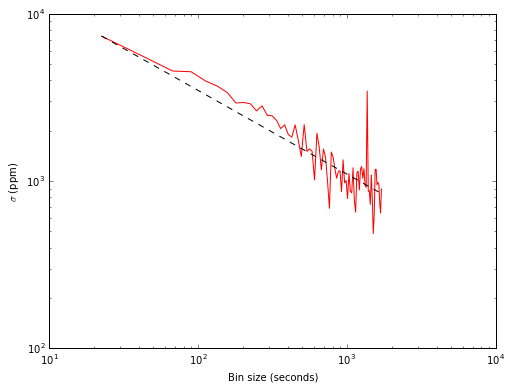

In [78]:
#using library
print 'Theoretical error: %f' % error
print 'Measured error: %f' % stdev
rl.rms_vs_bin(data['Time'], data['Flux'], 1, 77, 1, 306, 'r-')

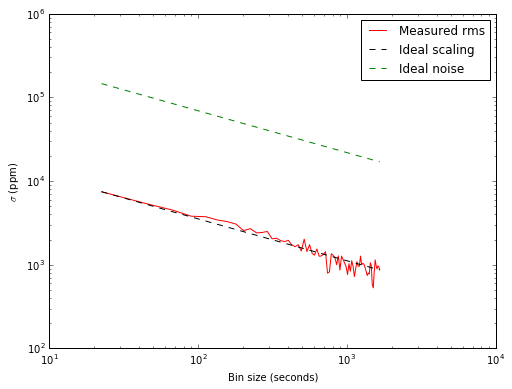

In [88]:
#New Code
rms_vs_bin(data['Time'], data['Flux'], 2.2, filenames, 1, 75, 1, 303, 'r-', lbl = 'Measured rms')
plt.legend(loc = 'best')